# Time series analysis on the data International Airline passengers from 1949 to 1960

In [1]:
# import libraries for time series analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# load csv
df = pd.read_csv('../00_datasets/flights.csv')
df.head()


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
df.shape

(144, 3)

In [4]:
# Convert year and month to a datetime object
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'])

/tmp/ipykernel_306194/3116760366.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'])


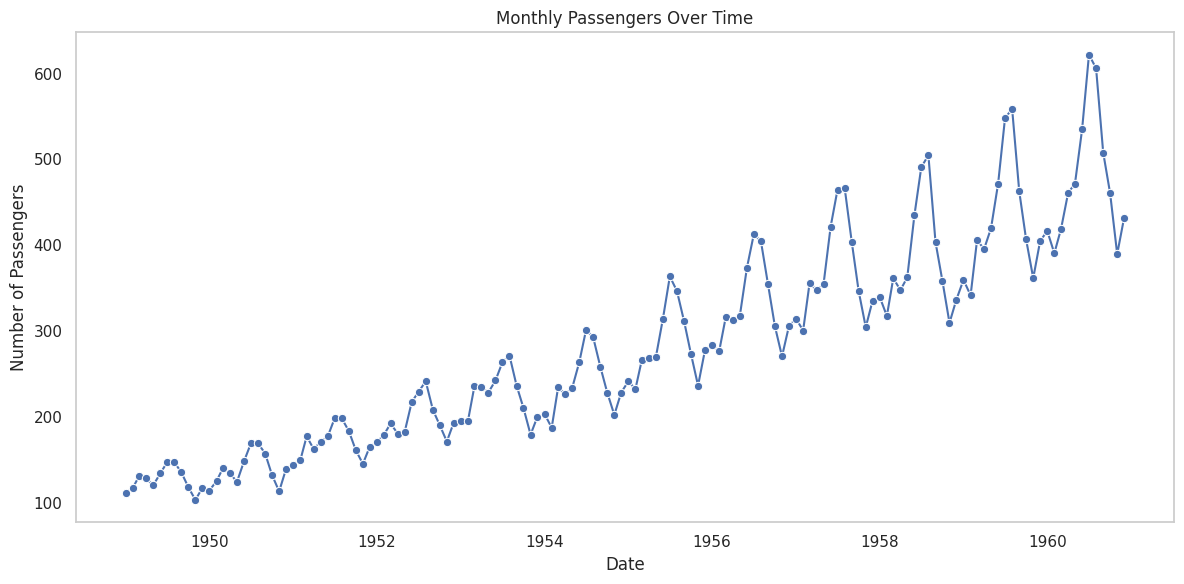

In [5]:
# plot date and passengers using sns
sns.set_theme(style='whitegrid') # darkgrid, ticks
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='passengers', data=df, marker='o')
plt.title('Monthly Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
# plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

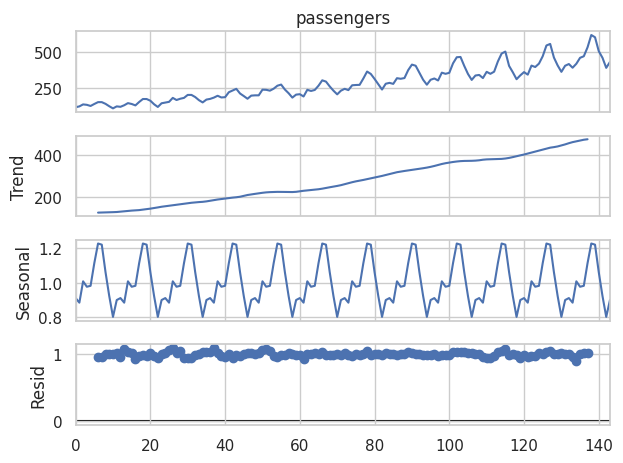

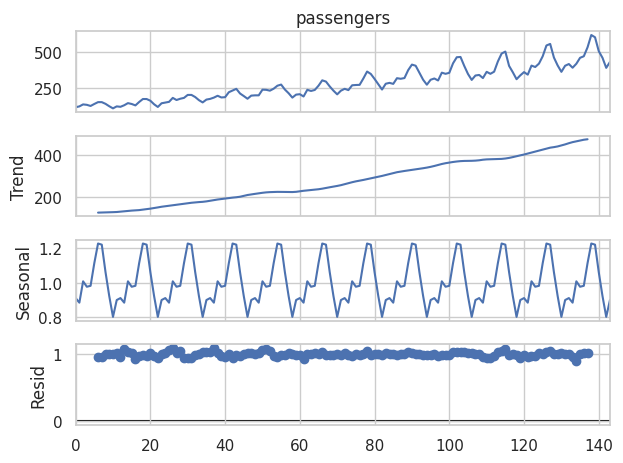

In [6]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df['passengers'], model='multiplicative', period=12) # additive - period=12: as data is monthly, period 12 will consider 1 seasonality of 12 months i.e; yearly seasonality
decompose.plot()

# period tells the function how many observations make up one complete seasonal cycle.

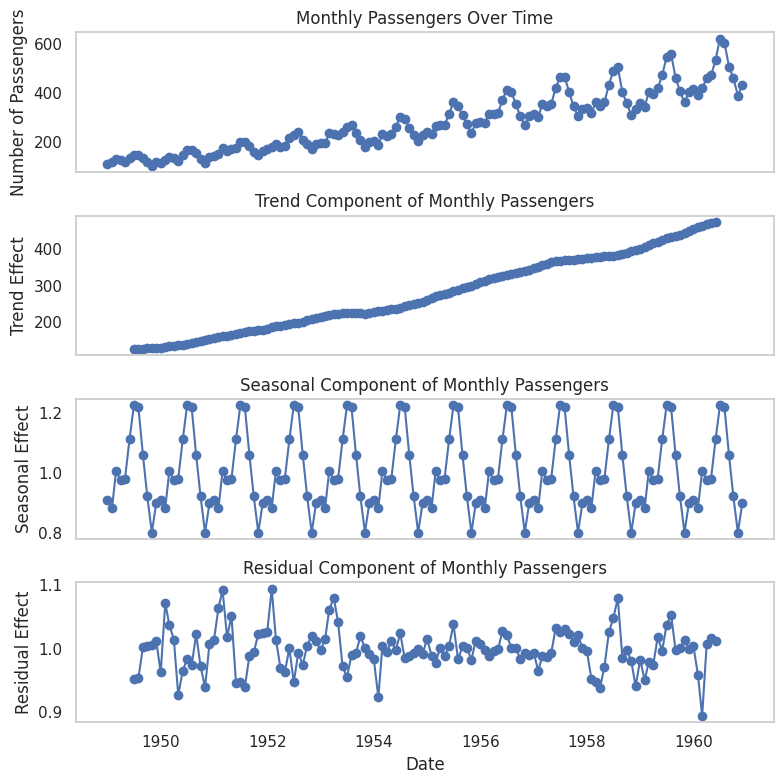

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

# Plot the original time series
axes[0].plot(df['date'], df['passengers'], marker='o', linestyle='-')
axes[0].set_title('Monthly Passengers Over Time')
axes[0].set_ylabel('Number of Passengers')
axes[0].grid()

# ETS - error(residual), trend, seasonality

# Plot the trend component - the trend is the long-term movement in the data
axes[1].plot(df['date'], decompose.trend, marker='o', linestyle='-')
axes[1].set_title('Trend Component of Monthly Passengers')
axes[1].set_ylabel('Trend Effect')
axes[1].grid()

# Plot the seasonal component - the seasonal component captures the repeating patterns in the data, such as yearly or monthly or weekly seasonality. or even based on seasons i.e; spring, summer, fall, winter
axes[2].plot(df['date'], decompose.seasonal, marker='o', linestyle='-')
axes[2].set_title('Seasonal Component of Monthly Passengers')
axes[2].set_ylabel('Seasonal Effect')
axes[2].grid()

# Plot the residual component - the residuals are the remaining variation after removing trend and seasonality - it is error
axes[3].plot(df['date'], decompose.resid, marker='o', linestyle='-')
axes[3].set_title('Residual Component of Monthly Passengers')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Residual Effect')
axes[3].grid()

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: >

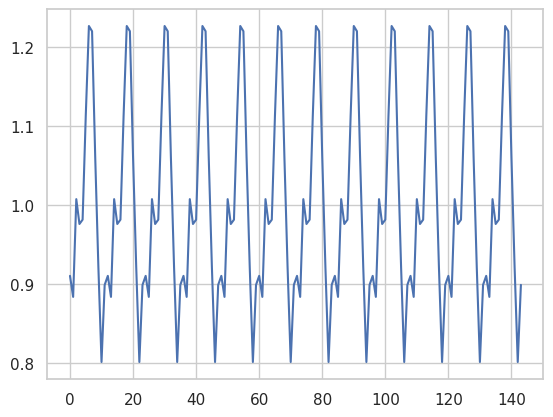

In [9]:
decompose.seasonal.plot()


In [10]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

2025-09-30 17:24:58.170618: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-30 17:24:58.172188: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 17:24:58.178389: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 17:24:58.196294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759235098.228492  306194 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759235098.23

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 82921.2344 - mae: 267.4993 - val_loss: 120191.3828 - val_mae: 339.4348
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 30800.7344 - mae: 158.2884 - val_loss: 21579.7344 - val_mae: 129.6736
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 9431.2734 - mae: 77.9527 - val_loss: 7617.1572 - val_mae: 77.2254
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6124.2627 - mae: 61.6511 - val_loss: 32520.4453 - val_mae: 167.4396
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12414.6279 - mae: 90.9642 - val_loss: 32500.5977 - val_mae: 168.0268
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12304.8652 - mae: 84.7974 - val_loss: 14654.9961 - val_mae: 105.6843
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9295.4600 - mae: 76.0460 - val_loss: 4294.1816 - val_mae: 55.8421
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3536.5132 - mae: 44.8988 - val_loss: 6354.5835 - val_mae: 60.755

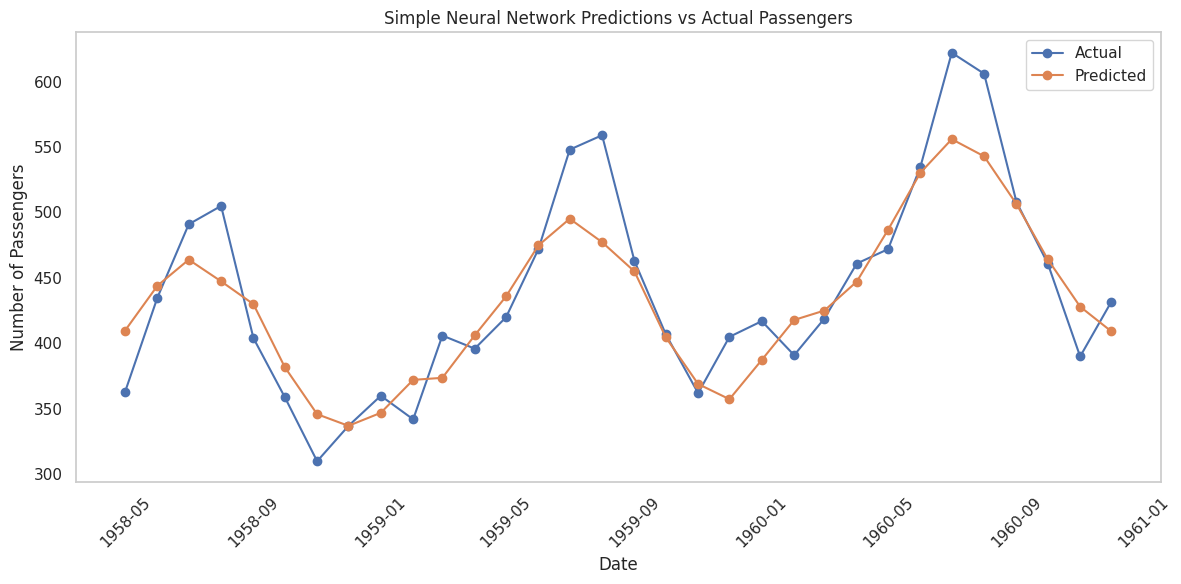

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# prepare training and testing data from df
train_size = int(len(df) * 0.7)

train = df[:train_size] # first 70% of the data
test = df.iloc[train_size:] # last 30% of the data

# Prepare the data for the neural network
time_step = 12  # We will use the last 12 months to predict the next month
X_train, y_train = [], []
for i in range(time_step, len(train)):
    X_train.append(train['passengers'].values[i-time_step:i])
    y_train.append(train['passengers'].values[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the test data in the same way
X_test, y_test = [], []
for i in range(time_step, len(test)):
    X_test.append(test['passengers'].values[i-time_step:i])
    y_test.append(test['passengers'].values[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# ### Data preparation with inline-for-loop method
# # define the number of lagged time steps to use as input features
# n_lags = 12
# # create the input and output data for the neural network
# X_train = np.array([train["passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
# y_train = np.array(train["passengers"].values[n_lags:])
# X_test = np.array([test["passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
# y_test = np.array(test["passengers"].values[n_lags:])

# Create a simple neural network model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1],)))  # Flatten the input
model.add(Dense(128, activation='relu'))  # First hidden layer
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test['date'][time_step:], test['passengers'].values[time_step:], label='Actual', marker='o')
plt.plot(test['date'][time_step:], predictions.flatten(), label='Predicted', marker='o')
plt.title('Simple Neural Network Predictions vs Actual Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88, 12)
(32, 12)
(88,)
(32,)


In [13]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(predictions)

[[112 118 132 ... 119 104 118]
 [118 132 129 ... 104 118 115]
 [132 129 121 ... 118 115 126]
 ...
 [277 317 313 ... 271 306 315]
 [317 313 318 ... 306 315 301]
 [313 318 374 ... 315 301 356]]
[[355 422 465 467 404 347 305 336 340 318 362 348]
 [422 465 467 404 347 305 336 340 318 362 348 363]
 [465 467 404 347 305 336 340 318 362 348 363 435]
 [467 404 347 305 336 340 318 362 348 363 435 491]
 [404 347 305 336 340 318 362 348 363 435 491 505]
 [347 305 336 340 318 362 348 363 435 491 505 404]
 [305 336 340 318 362 348 363 435 491 505 404 359]
 [336 340 318 362 348 363 435 491 505 404 359 310]
 [340 318 362 348 363 435 491 505 404 359 310 337]
 [318 362 348 363 435 491 505 404 359 310 337 360]
 [362 348 363 435 491 505 404 359 310 337 360 342]
 [348 363 435 491 505 404 359 310 337 360 342 406]
 [363 435 491 505 404 359 310 337 360 342 406 396]
 [435 491 505 404 359 310 337 360 342 406 396 420]
 [491 505 404 359 310 337 360 342 406 396 420 472]
 [505 404 359 310 337 360 342 406 396 420 4

Mean Squared Error: 14354.64875


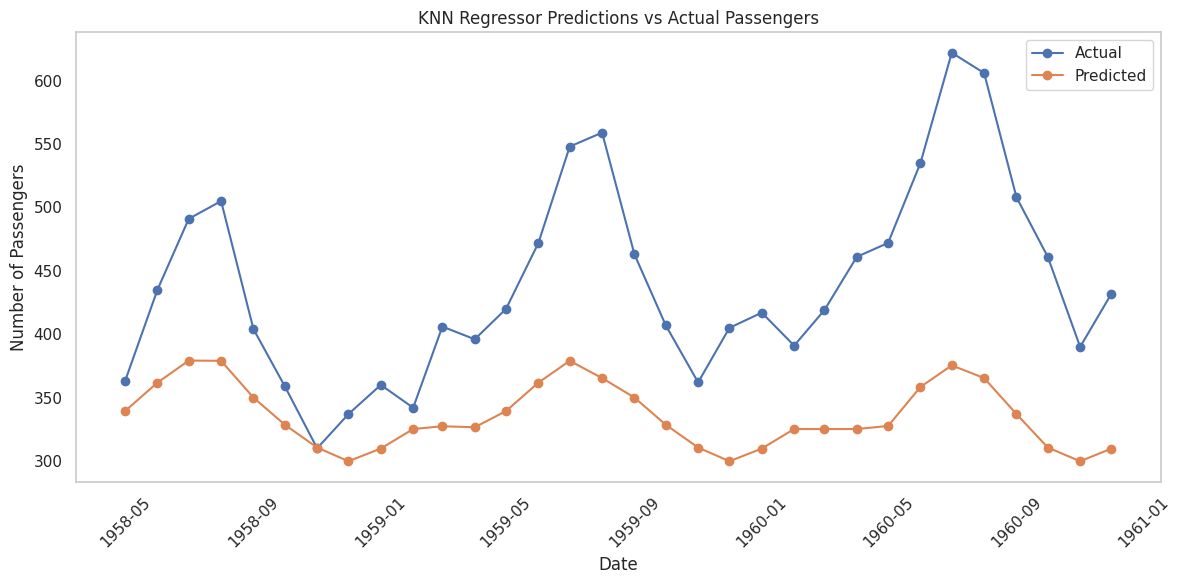

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Reshape the data for KNN (KNN expects 2D input for features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_reshaped, y_train)

# Make predictions
knn_predictions = knn.predict(X_test_reshaped)

# Calculate the mean squared error
mse = mean_squared_error(y_test, knn_predictions)
print(f"Mean Squared Error: {mse}")

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test['date'][time_step:], y_test, label='Actual', marker='o')
plt.plot(test['date'][time_step:], knn_predictions, label='Predicted', marker='o')
plt.title('KNN Regressor Predictions vs Actual Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
